In [293]:
import pandas as pd
from operator import attrgetter
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df=pd.read_csv(r"V:\Downloads\Demo_sales_data.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,08/11/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58
2,3,CA-2016-138688,12/06/2021,16/06/2021,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.87
3,14,CA-2016-161389,05/12/2021,10/12/2021,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3,0.2,132.59
4,22,CA-2016-137330,09/12/2021,13/12/2021,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.06


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2587 non-null   int64  
 1   Order ID       2587 non-null   object 
 2   Order Date     2587 non-null   object 
 3   Ship Date      2587 non-null   object 
 4   Ship Mode      2587 non-null   object 
 5   Customer ID    2587 non-null   object 
 6   Customer Name  2587 non-null   object 
 7   Segment        2587 non-null   object 
 8   Country        2587 non-null   object 
 9   City           2587 non-null   object 
 10  State          2587 non-null   object 
 11  Postal Code    2587 non-null   int64  
 12  Region         2587 non-null   object 
 13  Product ID     2587 non-null   object 
 14  Category       2587 non-null   object 
 15  Sub-Category   2587 non-null   object 
 16  Product Name   2587 non-null   object 
 17  Sales          2587 non-null   float64
 18  Quantity

In [296]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df.drop(columns=['Row ID','Order ID','Ship Date','Ship Mode','City','State','Region','Profit','Customer Name','Segment','Country','Postal Code','Product ID','Category','Sub-Category','Product Name','Discount'],inplace=True)

In [297]:
reference_date = pd.to_datetime('2021-12-31')

In [298]:
df.head()

,Order Date,Customer ID,Sales,Quantity
0,2021-11-08,CG-12520,261.96,2
1,2021-11-08,CG-12520,731.94,3
2,2021-06-12,DV-13045,14.62,2
3,2021-12-05,IM-15070,407.98,3
4,2021-12-09,KB-16585,19.46,7


In [299]:
aggregated_df = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Customer ID': 'size'
}).rename(columns={'Order Date': 'recency', 'Customer ID': 'frequency', 'Sales': 'monetary_value'})

In [300]:
aggregated_df.head()

,monetary_value,recency,frequency
Customer ID,,,
AA-10315,4406.07,303,4
AA-10375,530.29,47,4
AA-10480,1747.50,127,10
AA-10645,1668.19,118,8
AB-10015,563.94,51,2


In [301]:
quartiles = aggregated_df.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))
quartiles=quartiles.to_dict()
quartiles
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

      monetary_value  recency  frequency
0.25        107.2775     32.0        2.0
0.50        495.7300     72.0        3.0
0.75       1210.8250    148.5        6.0 <class 'pandas.core.frame.DataFrame'>


In [302]:
rfmSeg = aggregated_df
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [303]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str)+rfmSeg.F_Quartile.map(str)+rfmSeg.M_Quartile.map(str)

In [304]:
rfmSeg.head()

,monetary_value,recency,frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer ID,,,,,,,
AA-10315,4406.07,303,4,4,2,1,421
AA-10375,530.29,47,4,2,2,2,222
AA-10480,1747.50,127,10,3,1,1,311
AA-10645,1668.19,118,8,3,1,1,311
AB-10015,563.94,51,2,2,4,2,242


In [305]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']

In [306]:
rfmSeg.sort_values(by='Total Score',ascending=False).head(10)

,monetary_value,recency,frequency,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
Customer ID,,,,,,,,
PG-18895,39.12,253,2,4,4,4,444,12
TH-21100,27.86,236,1,4,4,4,444,12
RA-19285,3.98,149,1,4,4,4,444,12
BE-11335,102.92,159,2,4,4,4,444,12
BD-11725,46.72,309,1,4,4,4,444,12
RE-19450,29.61,170,1,4,4,4,444,12
LB-16735,21.48,159,1,4,4,4,444,12
BB-10990,61.70,274,2,4,4,4,444,12
PS-18970,8.00,236,1,4,4,4,444,12


In [307]:
rfmSeg.groupby('Total Score').agg({'monetary_value':'mean','recency':'mean','frequency':'mean','RFMClass':['min','max']})

monetary_value     recency  frequency RFMClass     
                      mean        mean       mean      min  max
Total Score                                                    
3              2690.095294   15.558824  11.117647      111  111
4              1978.730345   28.672414   7.517241      112  211
5              2597.510962   50.346154   6.326923      113  311
6              1209.078293   61.951220   5.134146      123  411
7              1025.152034   86.932203   4.186441      124  421
8               557.317093  103.325581   3.523256      134  431
9               421.241867  105.693333   2.360000      144  441
10              254.817595  134.164557   1.797468      244  442
11              110.245614  166.421053   1.526316      344  443
12               41.791071  236.267857   1.196429      444  444

In [308]:
# Cohort Analysis with same dataset
df.head()

,Order Date,Customer ID,Sales,Quantity
0,2021-11-08,CG-12520,261.96,2
1,2021-11-08,CG-12520,731.94,3
2,2021-06-12,DV-13045,14.62,2
3,2021-12-05,IM-15070,407.98,3
4,2021-12-09,KB-16585,19.46,7


In [309]:
df['order_month'] = df['Order Date'].dt.to_period('M')

In [310]:
df['cohort'] = df.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')
df.head()

,Order Date,Customer ID,Sales,Quantity,order_month,cohort
0,2021-11-08,CG-12520,261.96,2,2021-11,2021-11
1,2021-11-08,CG-12520,731.94,3,2021-11,2021-11
2,2021-06-12,DV-13045,14.62,2,2021-06,2021-06
3,2021-12-05,IM-15070,407.98,3,2021-12,2021-06
4,2021-12-09,KB-16585,19.46,7,2021-12,2021-01


In [311]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)
df_cohort.head()

,cohort,order_month,n_customers
0,2021-01,2021-01,46
1,2021-01,2021-02,1
2,2021-01,2021-03,2
3,2021-01,2021-04,4
4,2021-01,2021-05,5


In [312]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2021-01,2021-01,46,0
1,2021-01,2021-02,1,1
2,2021-01,2021-03,2,2
3,2021-01,2021-04,4,3
4,2021-01,2021-05,5,4


In [313]:
df_cohort['cohort'] = df_cohort['cohort'].dt.strftime('%b-%Y')
# df_cohort['order_month'] = df_cohort['order_month'].dt.strftime('%b-%Y')
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')
cohort_pivot = cohort_pivot.sort_index(key=lambda x: pd.to_datetime(x, format='%b-%Y'))

In [314]:
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
Jan-2021,46.0,1.0,2.0,4.0,5.0,5.0,6.0,4.0,8.0,6.0,12.0,12.0
Feb-2021,41.0,3.0,3.0,2.0,6.0,4.0,2.0,7.0,7.0,5.0,7.0,NaN
Mar-2021,75.0,8.0,11.0,12.0,11.0,6.0,19.0,9.0,14.0,18.0,NaN,NaN
Apr-2021,68.0,10.0,7.0,10.0,9.0,21.0,8.0,11.0,16.0,NaN,NaN,NaN
May-2021,68.0,6.0,10.0,5.0,19.0,10.0,19.0,11.0,NaN,NaN,NaN,NaN
Jun-2021,54.0,4.0,4.0,15.0,7.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN
Jul-2021,44.0,6.0,13.0,3.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
Aug-2021,50.0,9.0,4.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sep-2021,65.0,3.0,15.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
import matplotlib.colors as mcolors

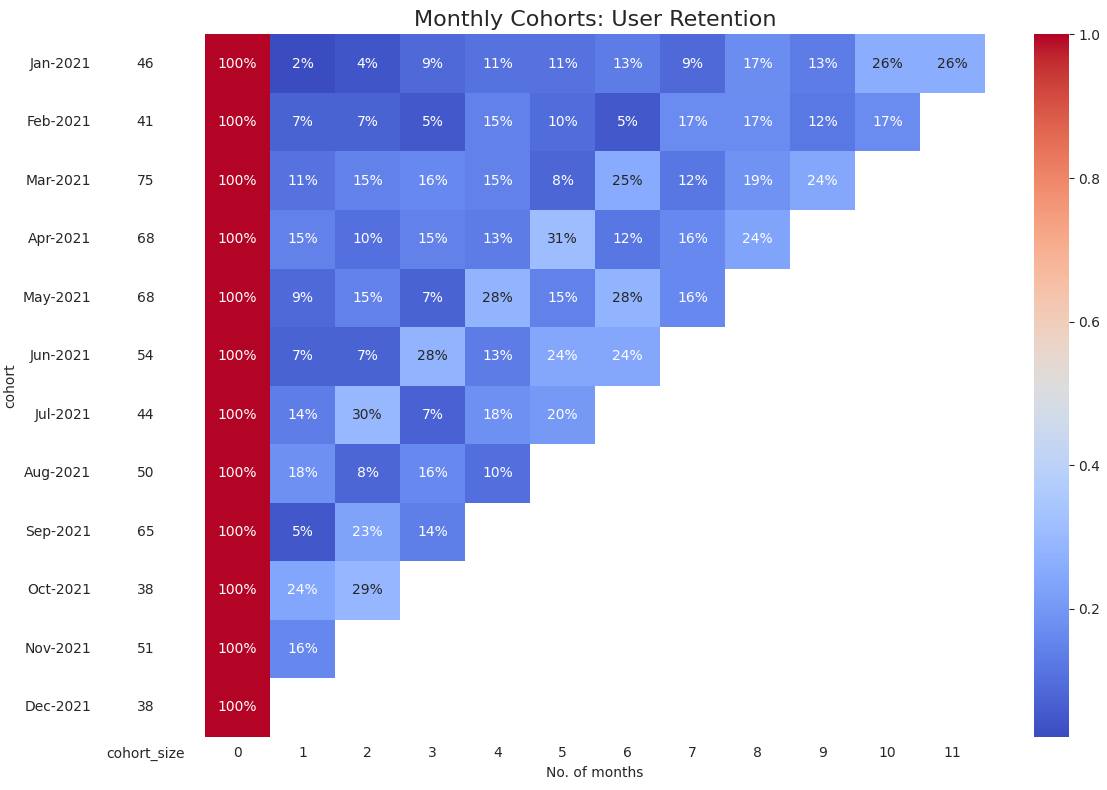

In [316]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='coolwarm', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='No. of months',
              ylabel='')
    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])
    fig.tight_layout()

In [ ]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('Customer ID', 'nunique')).reset_index(drop=False)
df_cohort.head()